# Project  ID  :  "PTID-CDS-JUN-23-1562"


1) Vyankatesh Kongari (Vyankateshkongari12345@gmail.com)


###### =============================================================================================================

# PRCP-1024-TexasSalaryPrediction
###### =============================================================================================================

## Problem Statement

**Task 1**:-Prepare a complete data analysis report on the given data.

**Task 2**:-Create a predictive model which will help the Texas state government team to know the payroll information of employees of the state of Texas.  

**Task 3**:-

* Who are the outliers in the salaries?

* What departments/roles have the biggest wage disparities between managers and employees?

* Have salaries and total compensations for some roles/ departments/ head-count changed over time?

###### ============================================================================================================

# Task 1

## Domain analysis :

* **This database has salary information for positions at all 113 agencies in the Texas state government. The Tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.**
* **Our main objective is to predict salary information of employees at different agencies in Texas state government using given twenty one features.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data = pd.read_csv('salary.csv',low_memory=False)
'''option tells Pandas to read the entire file into memory at once, which can be helpful if
the file is large or if you need to do some operations that require all of the data to be in memory.'''

'option tells Pandas to read the entire file into memory at once, which can be helpful if\nthe file is large or if you need to do some operations that require all of the data to be in memory.'

In [3]:
data.head(1)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN


In [4]:
data.shape

(149481, 21)

In [5]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [7]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [8]:
data.describe(include="O")

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


### Attribute Information:
#### Input variables:

1) Agency: It is the agency code for particular agency and the total number of agency are 113.

2) AGENCY NAME: The dataset contain diiferent agencies working for texas government

3) First name: First name of the individual.

4) Last Name: Last name of the individual.

5) MI : Middle Initial of an individual.

6) CLASS CODE: This is the unique code given each designation of the employee.

7) CLASS TITLE: This is the job title/designation of the employee.

8) ETHNICITY: An ethnic group or ethnicity is a population group whose members identify with each other on the basis of common cultural type.

9) GENDER: It represent gender of the individual

10) STATUS: It represent the working hour and type of job(Temporary or permanent job)

11) EMPLOY DATE: Date of joining of the particular employee for particular job.

12) HRLY RATE: This the compensation paid to employee per Hour of work done.

13) HRS PER WK: This is the number of working hours per week done by the employee.

14) MONTHLY: This is the salary paid to employee per month.

15) STATE NUMBER: a unique number assigned to a business or organization by the state where the business operates, and is used for filing taxes and hiring employees.

16) duplicated: This columns represents the weather record is repeated/duplicated or not.

17) multiple_full_time_jobs: It shows that weather the each individual is working more then one job full time.

18) combined_multiple_jobs : The Combine_Multiple_job feature allows you to merge two or more jobs from the same market view into a single job.

19) summed_annual_salary: The total salary earned by an individual in a year including multiple full time jobs and combined multiple jobs.

20) hide_from_search : gives you the option for your searches to be hidden


#### Output variables:

21) ANNUAL: This is the salary paid to employee per year.


### Insights :

* The dataset is salary dataset for positions at all 113 agencies in the Texas state government with **149481 datapoints having 21 features** including target variable. 
* Dataset having both **numerical(8) as well as categorical values(13)** with some null values is there in "duplicated","multiple_full_time_jobs","combined_multiple_jobs", "summed_annual_salary", "hide_from_search" columns.                         
* The maximum salary earned by employee per year is **553500**, where as minimum is **600**.
* The maximum working hour per week per employee is **70 hours**, where as minimum is **1 hour**. 
* The unique number assigned to a business or organization by the state where the business operates, and is used for filing taxes and hiring employees.
* Datataset given **monthly as well as annual sallary** of individual.                                                          We select monthly salary as one of our feature variable and   **annual sallary as our target variable** 
* The standard deviation for "multiple full time jobs" column is 0, hence their is no variance in the data, we can drop that particular column in our data preprocessing step.

In [9]:
data["multiple_full_time_jobs"].unique()

array([nan,  1.])

In [10]:
# we drop "multiple_full_time_jobs" column because of only one unique value and absence of any variance.
data = data.drop("multiple_full_time_jobs", axis=1)

In [11]:
## Renaming certain columns just to make easy

data.rename(columns= {'AGENCY':"agency", 'AGENCY NAME':"agency_name", 'LAST NAME':"l_name", 'FIRST NAME':"f_name",
                     
                      'MI':"m_initial", 'CLASS CODE':"class_code", 'CLASS TITLE':"class_title", 'ETHNICITY':"ethnicity", 
                     
                      'GENDER':"gender",'STATUS':"status", 'EMPLOY DATE':"emp_date",'HRLY RATE':"hr_rate",
                     
                      'HRS PER WK':"hr_per_wk", 'MONTHLY':"m_salary", 'ANNUAL':"a_salary", 'STATE NUMBER':"state_no",
                     
                      'combined_multiple_jobs':"comb_mlti_jobs" }, inplace=True)

In [12]:
# Segregate numerical and categorical data
# Create new dataframe for numerical columns only
data1 = data[['agency', 'hr_rate', 'hr_per_wk','m_salary', 'a_salary', 'a_salary', 'state_no', 'summed_annual_salary' ]]

In [13]:
# Create new dataframe for categorical columns only
data2 = data[['agency_name', 'l_name', 'f_name', 'm_initial', 'class_code', 'class_title', 'ethnicity',             
               'gender', 'status', 'emp_date']]

In [14]:
data1.head() #numerical data

,agency,hr_rate,hr_per_wk,m_salary,a_salary,a_salary,state_no,summed_annual_salary
0,241,75.96150,29.0,9545.82,114549.84,114549.84,127717,131407.08
1,212,81.04454,4.0,1404.77,16857.24,16857.24,127717,NaN
2,241,75.96150,29.0,9545.82,114549.84,114549.84,59115,131407.08
3,212,81.04453,4.0,1404.77,16857.24,16857.24,59115,NaN
4,696,0.00000,40.0,3284.27,39411.24,39411.24,165030,NaN


In [15]:
data2.head() #categorical data

,agency_name,l_name,f_name,m_initial,class_code,class_title,ethnicity,gender,status,emp_date
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20


# Exploratory Data Analysis (EDA) :

#### Here we have to analyse the data to discover relationships between measures in the dataset and to gain an insight on the trends, patterns, and relationships among various entities present in the dataset.                                                                                                         We doing here univariate, bivariate and multivariate analysis of different features as follows:

In [16]:
eda_data = data[['agency_name','class_title','ethnicity','gender','status','hr_per_wk','m_salary','hr_rate']]

In [17]:
# Univariate analysis with sweetviz
import sweetviz as sv
sv.analyze(data).show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights :
* **There is no proper distribution in agency_Name, class_title.The majority of employee working in HEALTH AND HUMAN SERVICES COMMISSION that is about 36667 and TEXAS DEPARTMENT OF CRIMINAL JUSTICE is being in second place having 35926.More number of employees belongs WHITE ETHNICITY, where OTHER and AM INDIAN are less. More Employees are Female individuals.**

* **Most of the employees works on CLASSIFIED_REGULAR_FULL_TIME. The majority number of empployees are working 40hrs per week.**

* **MONTHLY and HRLY_RATE is having right sckewed distribution. The majority of employees having the hourly rate between 0 to 8**

* **The majority of employees having salary less then 10000 per month.**
* **STATUS and HRS_PER_WK is having Normal distribution.**

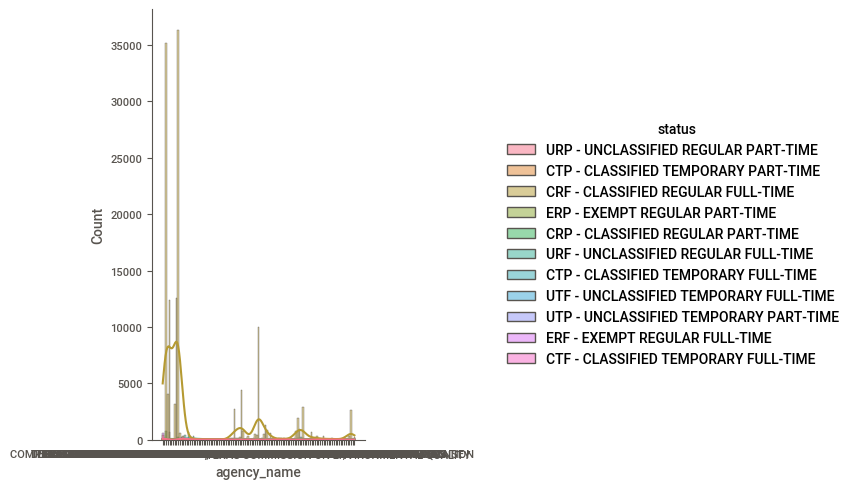

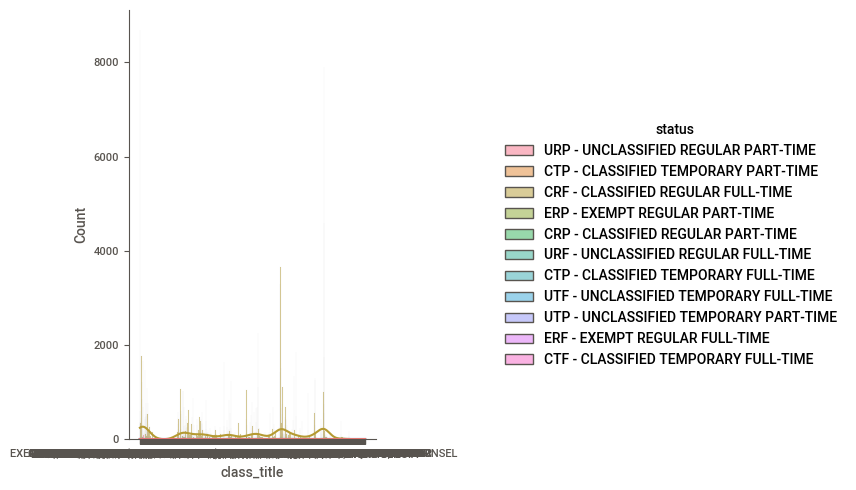

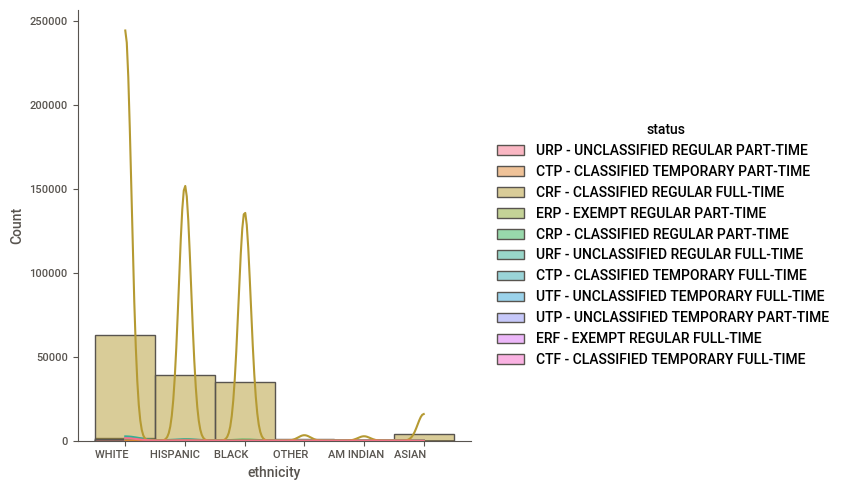

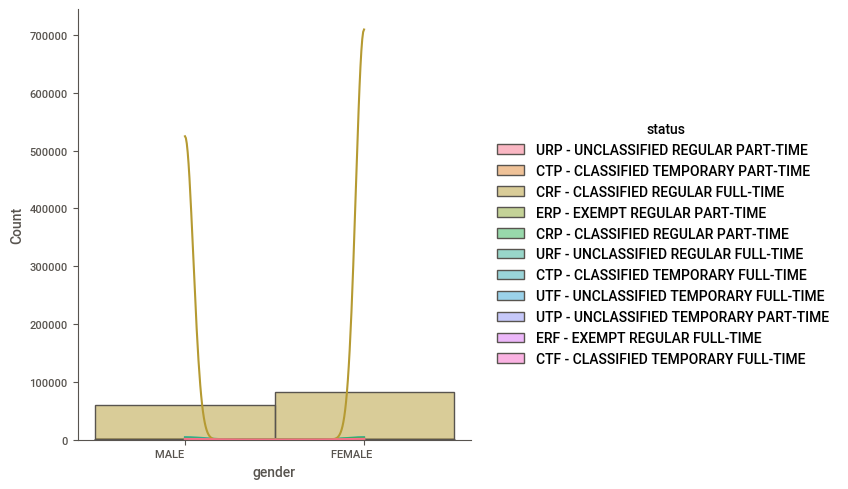

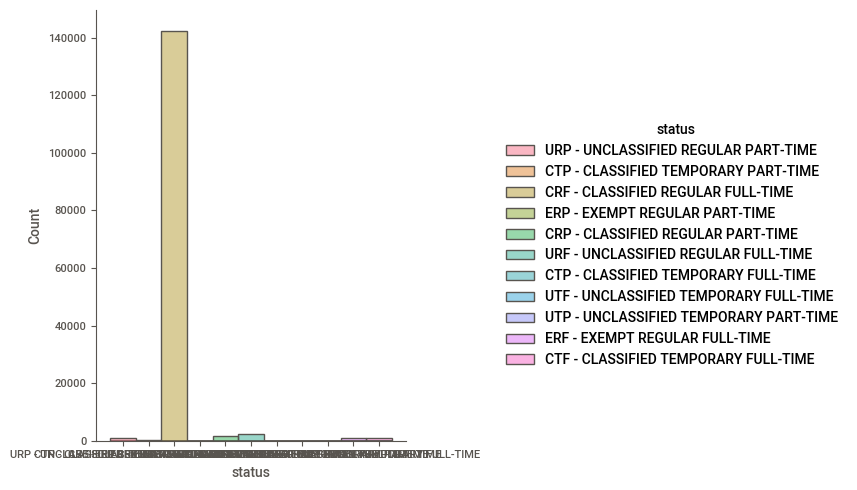

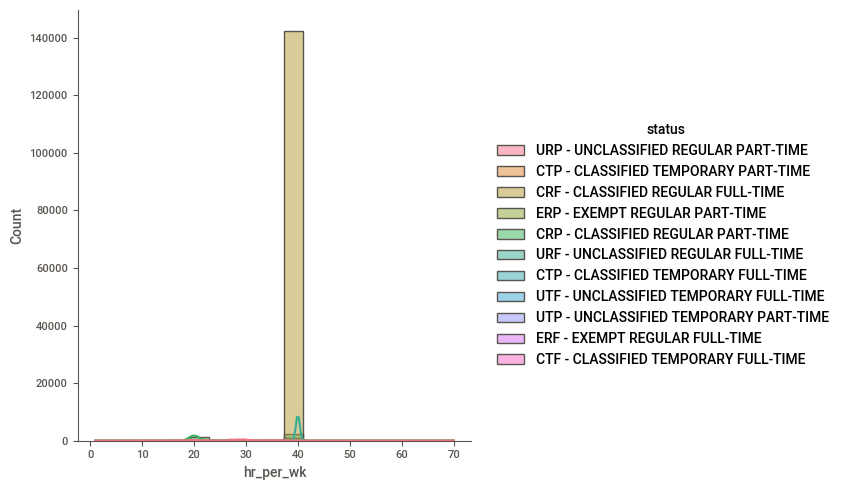

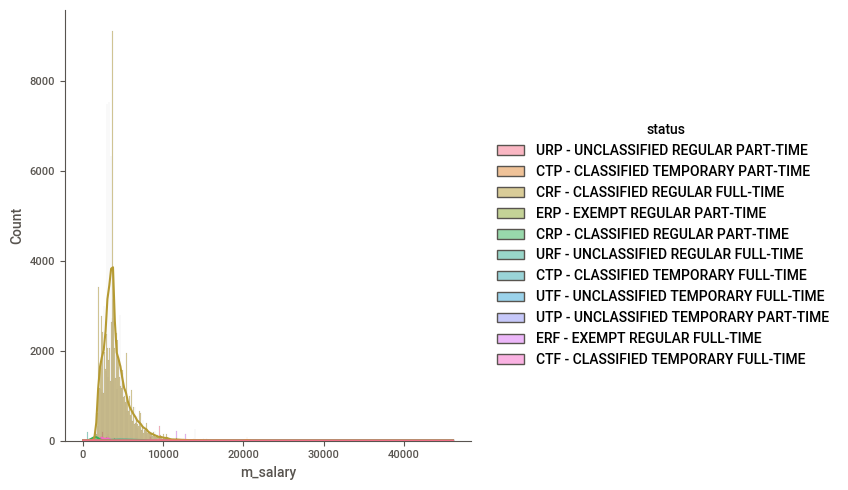

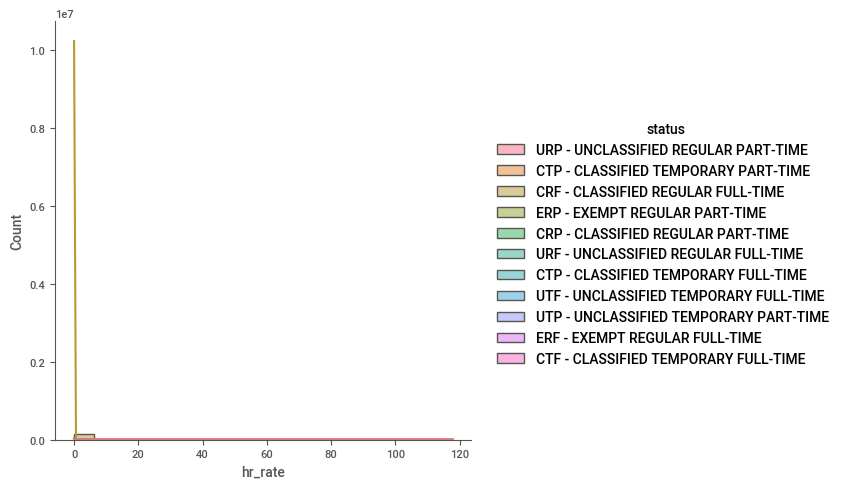

In [18]:
for columns in eda_data:
    sns.displot(x=columns, data=eda_data, kde=True, hue='status')
plt.show()

<Figure size 2000x2000 with 0 Axes>

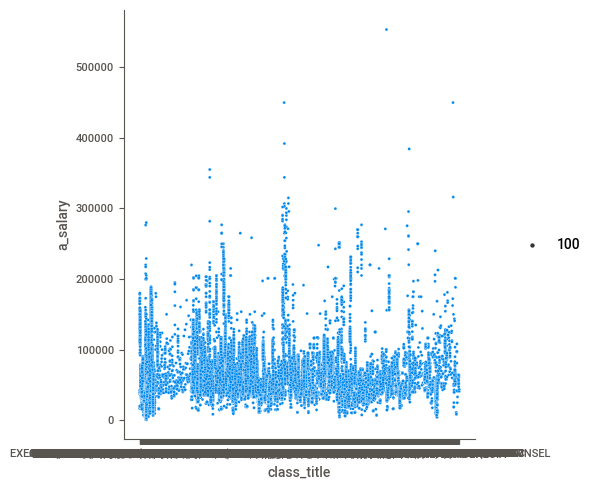

In [19]:
plt.figure(figsize=(20,20))
sns.relplot(x='class_title',y='a_salary',data=data, size=100)

<Figure size 2000x2000 with 0 Axes>

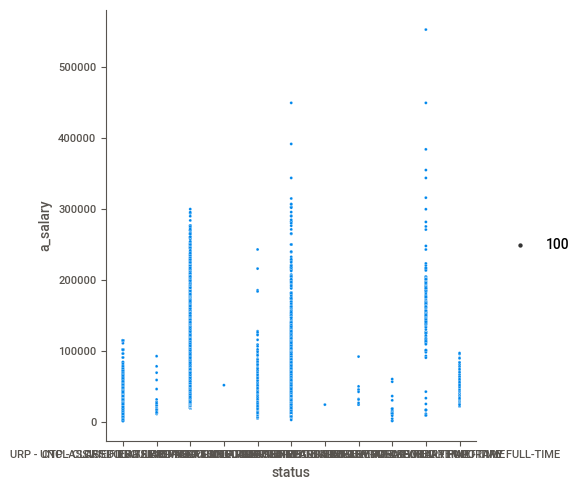

In [20]:
plt.figure(figsize=(20,20))
sns.relplot(x='status',y='a_salary',data=data, size=100)

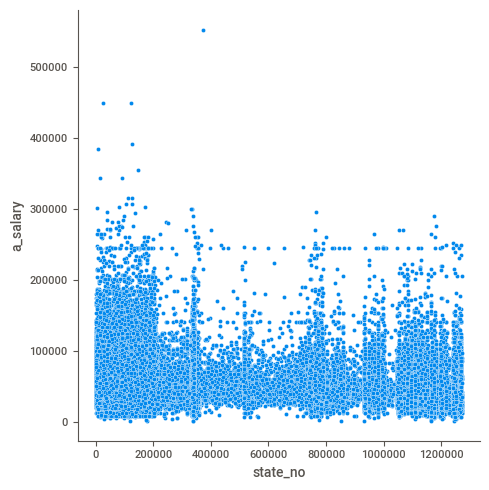

In [21]:
sns.relplot(x="state_no", y='a_salary',data=data)

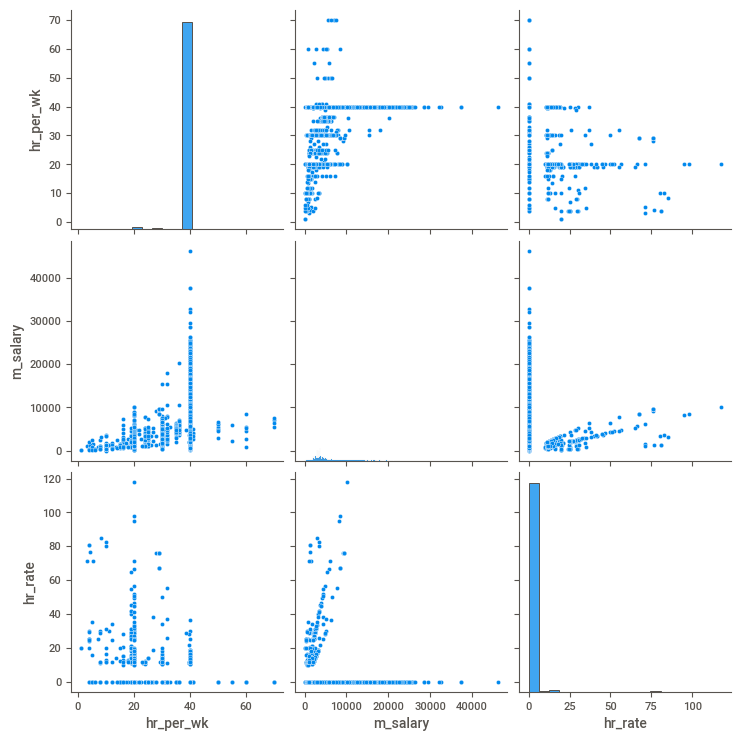

In [22]:
sns.pairplot(eda_data)

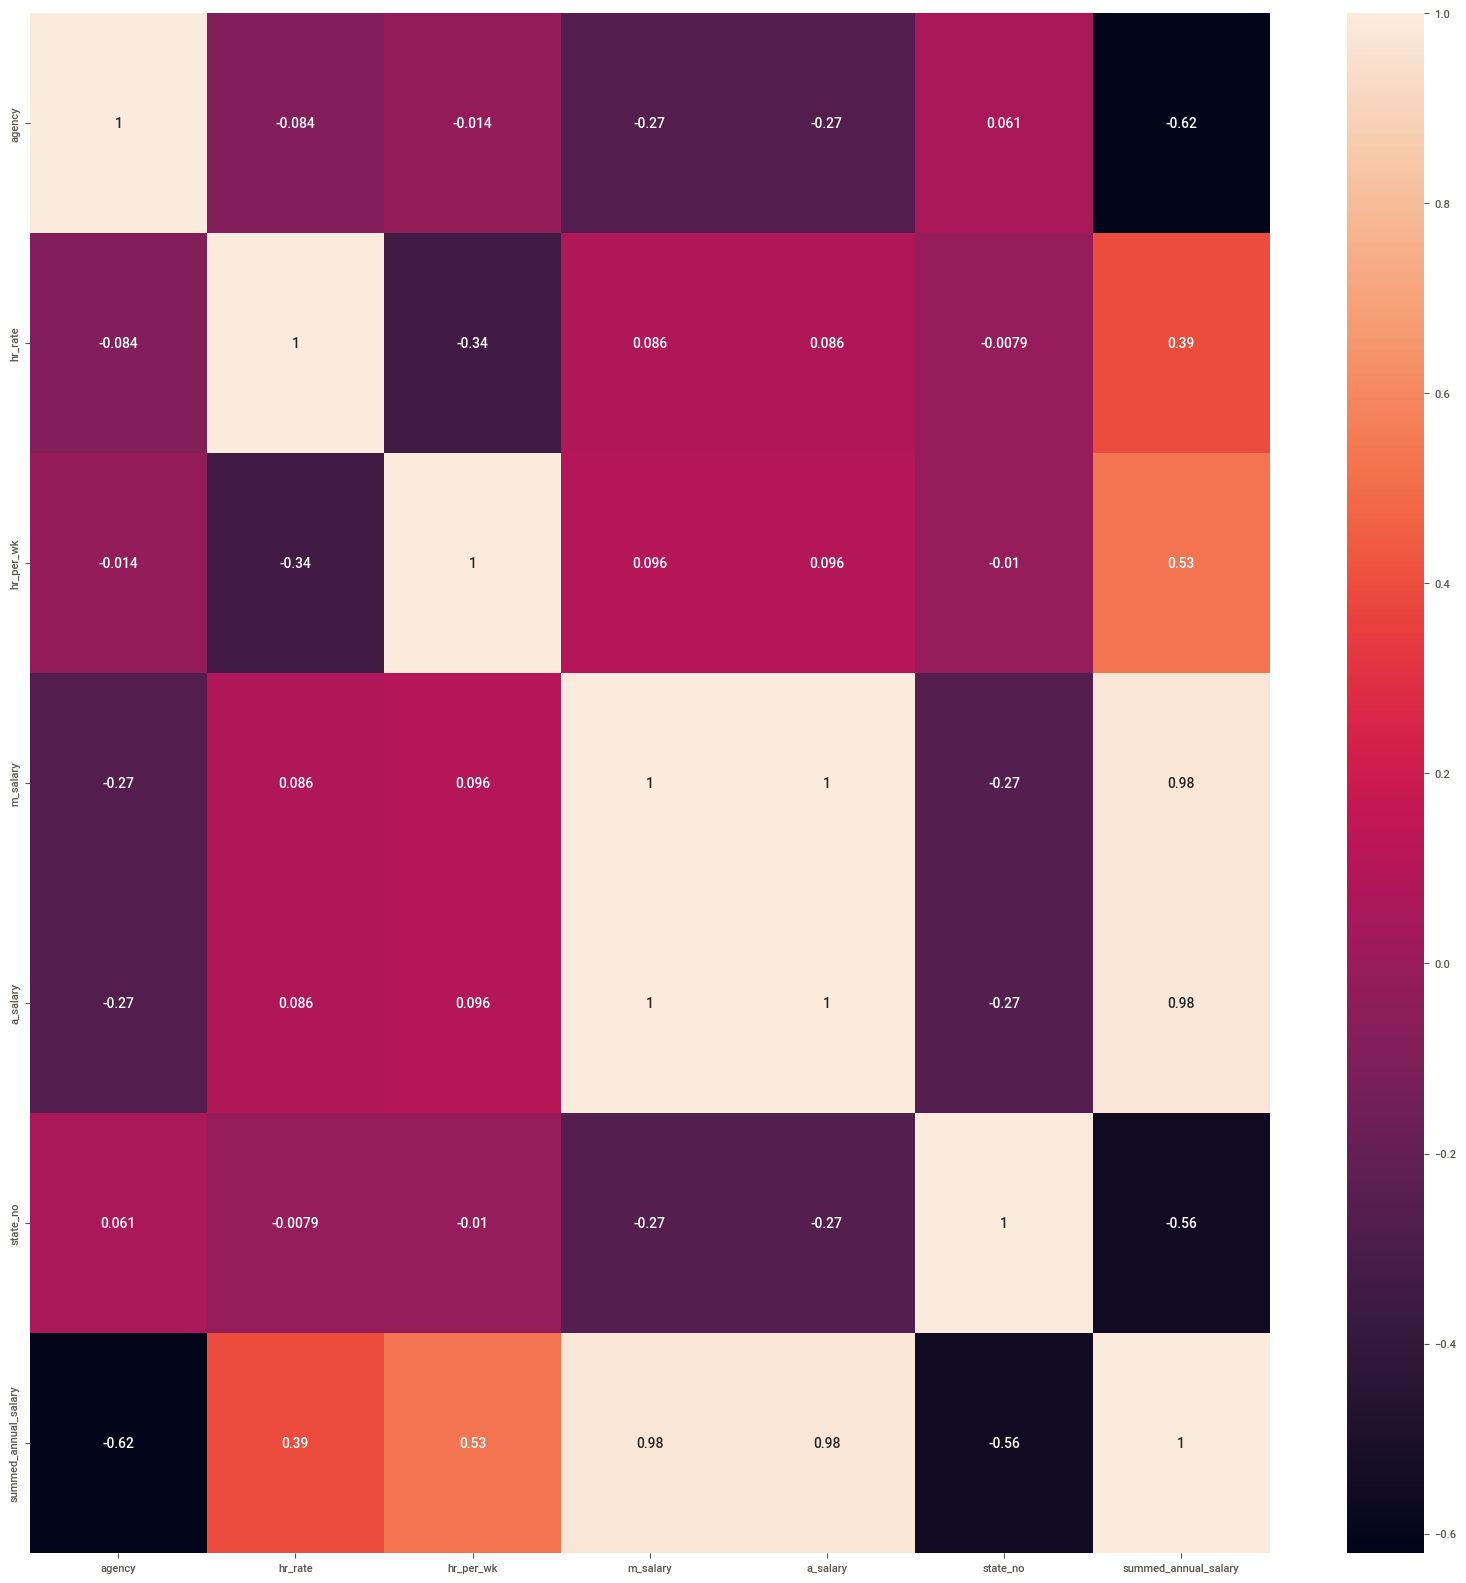

In [23]:
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [24]:
data.corr()

,agency,hr_rate,hr_per_wk,m_salary,a_salary,state_no,summed_annual_salary
agency,1.000000,-0.083653,-0.013847,-0.266452,-0.266452,0.060815,-0.620697
hr_rate,-0.083653,1.000000,-0.337784,0.086291,0.086291,-0.007922,0.392481
hr_per_wk,-0.013847,-0.337784,1.000000,0.096041,0.096041,-0.010072,0.529473
m_salary,-0.266452,0.086291,0.096041,1.000000,1.000000,-0.265438,0.977757
a_salary,-0.266452,0.086291,0.096041,1.000000,1.000000,-0.265438,0.977757
state_no,0.060815,-0.007922,-0.010072,-0.265438,-0.265438,1.000000,-0.556907
summed_annual_salary,-0.620697,0.392481,0.529473,0.977757,0.977757,-0.556907,1.000000


### Insights :
* **There is no trend between Agency_Name and Annual and also between Class_title and Annual.**
* **The Agencies are paying less then 200000 to their majority of employees per year.Males are getting more salary compared females.The Chief Scientific Officer(CLASS_TITLE) is getting highest salary that is about 553500 per Annum. Class_title majority of designation individual getting less then 200000.Exculding White people others are getting less then 300000 of salary per Annum.Highest salary paid to white people is above 500000.The maximum salary earned by URF - UNCLASSIFIED REGULAR FULL-TIME and ERF - EXEMPT REGULAR FULL-TIME. The individual who are working between 30 to 40hrs/week are earning more salary compared to others.HRLY_RATE and MONTHLY is having linear trend with Annual salary.**

* **Only one employee of STATE_NUMBER(372291) has salary of above 5lakh dollars and majority of them have salary less tham 3lakh dollars annually.**

* **m_salary is having 0.98 correlation with summed_annual_salary, so both columns are highly correlated with each other. Multiple_full_time_job is highly correlated with every other feature.**


###### ==================================================================================================================

# Data Preprocessing and Feature Selection :

In [25]:
data.head(1)

,agency,agency_name,l_name,f_name,m_initial,class_code,class_title,ethnicity,gender,status,emp_date,hr_rate,hr_per_wk,m_salary,a_salary,state_no,duplicated,comb_mlti_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717,True,NaN,131407.08,NaN


### Checking of null values/ missing values :

In [26]:
data.isnull().sum()

agency                       0
agency_name                  0
l_name                       0
f_name                       0
m_initial                    0
class_code                   0
class_title                  0
ethnicity                    0
gender                       0
status                       0
emp_date                     0
hr_rate                      0
hr_per_wk                    0
m_salary                     0
a_salary                     0
state_no                     0
duplicated              149338
comb_mlti_jobs          149384
summed_annual_salary    149465
hide_from_search        149465
dtype: int64

In [27]:
data["duplicated"].unique()

array([True, nan], dtype=object)

In [28]:
data["duplicated"].value_counts()

True    143
Name: duplicated, dtype: int64

In [29]:
data["comb_mlti_jobs"].unique()

array([nan, True], dtype=object)

In [30]:
data["comb_mlti_jobs"].value_counts()

True    97
Name: comb_mlti_jobs, dtype: int64

In [31]:
data["summed_annual_salary"].unique()

array([131407.08,       nan, 171383.4 ,  31950.  ,  33300.  ,  33966.  ,
        39174.  ,  35570.52,  56952.6 ,  21839.76, 121200.  ,  90000.  ,
       150000.  ,  92400.  ,  18000.  ,  30312.84])

In [32]:
data["summed_annual_salary"].value_counts().sum()

16

In [33]:
data["hide_from_search"].unique()

array([nan, True], dtype=object)

In [34]:
data["hide_from_search"].value_counts()

True    16
Name: hide_from_search, dtype: int64

* **There is null values in "duplicated", "comb_mlti_jobs", "summed_annual_salary", "hide_from_search" but instead of filling null values we drop these four features because having more then 96% of missing values, we are ignoring those columns.**
* **For particular agency_name their will be unique agency_code, so we are droping agency_name .**

* **We are dropping last name, first name, MI and emp_date because these are not relevent features for our model creation.**

* **For particular class_title, their will be unique class_code, in general they both represent same, hence we dropping class_code.**

In [35]:
data=data.drop(['l_name','f_name','m_initial','class_code', 'emp_date',
              'duplicated','comb_mlti_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [36]:
data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.9615,29.0,9545.82,114549.84,127717


## Conversion of categorical data into numrical :

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agency       149481 non-null  int64  
 1   agency_name  149481 non-null  object 
 2   class_title  149481 non-null  object 
 3   ethnicity    149481 non-null  object 
 4   gender       149481 non-null  object 
 5   status       149481 non-null  object 
 6   hr_rate      149481 non-null  float64
 7   hr_per_wk    149481 non-null  float64
 8   m_salary     149481 non-null  float64
 9   a_salary     149481 non-null  float64
 10  state_no     149481 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 12.5+ MB


In [38]:
categorical_col = []  

for column in data:    
    if data[column].dtype == object and len(data[column].unique()): 
        categorical_col.append(column)                                   
        
        print(f"{column} : {data[column].unique()}")   
        print("======================================================================")

agency_name : ['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISL

In [39]:
categorical_cols = ['agency_name', 'class_title', 'gender', 'status', 'ethnicity']

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   agency       149481 non-null  int64  
 1   agency_name  149481 non-null  int32  
 2   class_title  149481 non-null  int32  
 3   ethnicity    149481 non-null  int32  
 4   gender       149481 non-null  int32  
 5   status       149481 non-null  int32  
 6   hr_rate      149481 non-null  float64
 7   hr_per_wk    149481 non-null  float64
 8   m_salary     149481 non-null  float64
 9   a_salary     149481 non-null  float64
 10  state_no     149481 non-null  int64  
dtypes: float64(4), int32(5), int64(2)
memory usage: 9.7 MB


In [42]:
data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717


In [43]:
data.describe()

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,545.736288,60.276202,624.022090,3.593253,0.429172,0.221634,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,139.057691,28.849532,404.245777,1.359346,0.494960,1.164337,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,529.000000,40.000000,292.000000,2.000000,0.000000,0.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,530.000000,54.000000,494.000000,3.000000,0.000000,0.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,696.000000,88.000000,983.000000,5.000000,1.000000,0.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,930.000000,112.000000,1421.000000,5.000000,1.000000,10.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


In [44]:
data3= data[["hr_rate", "hr_per_wk", "m_salary", "a_salary" ]]

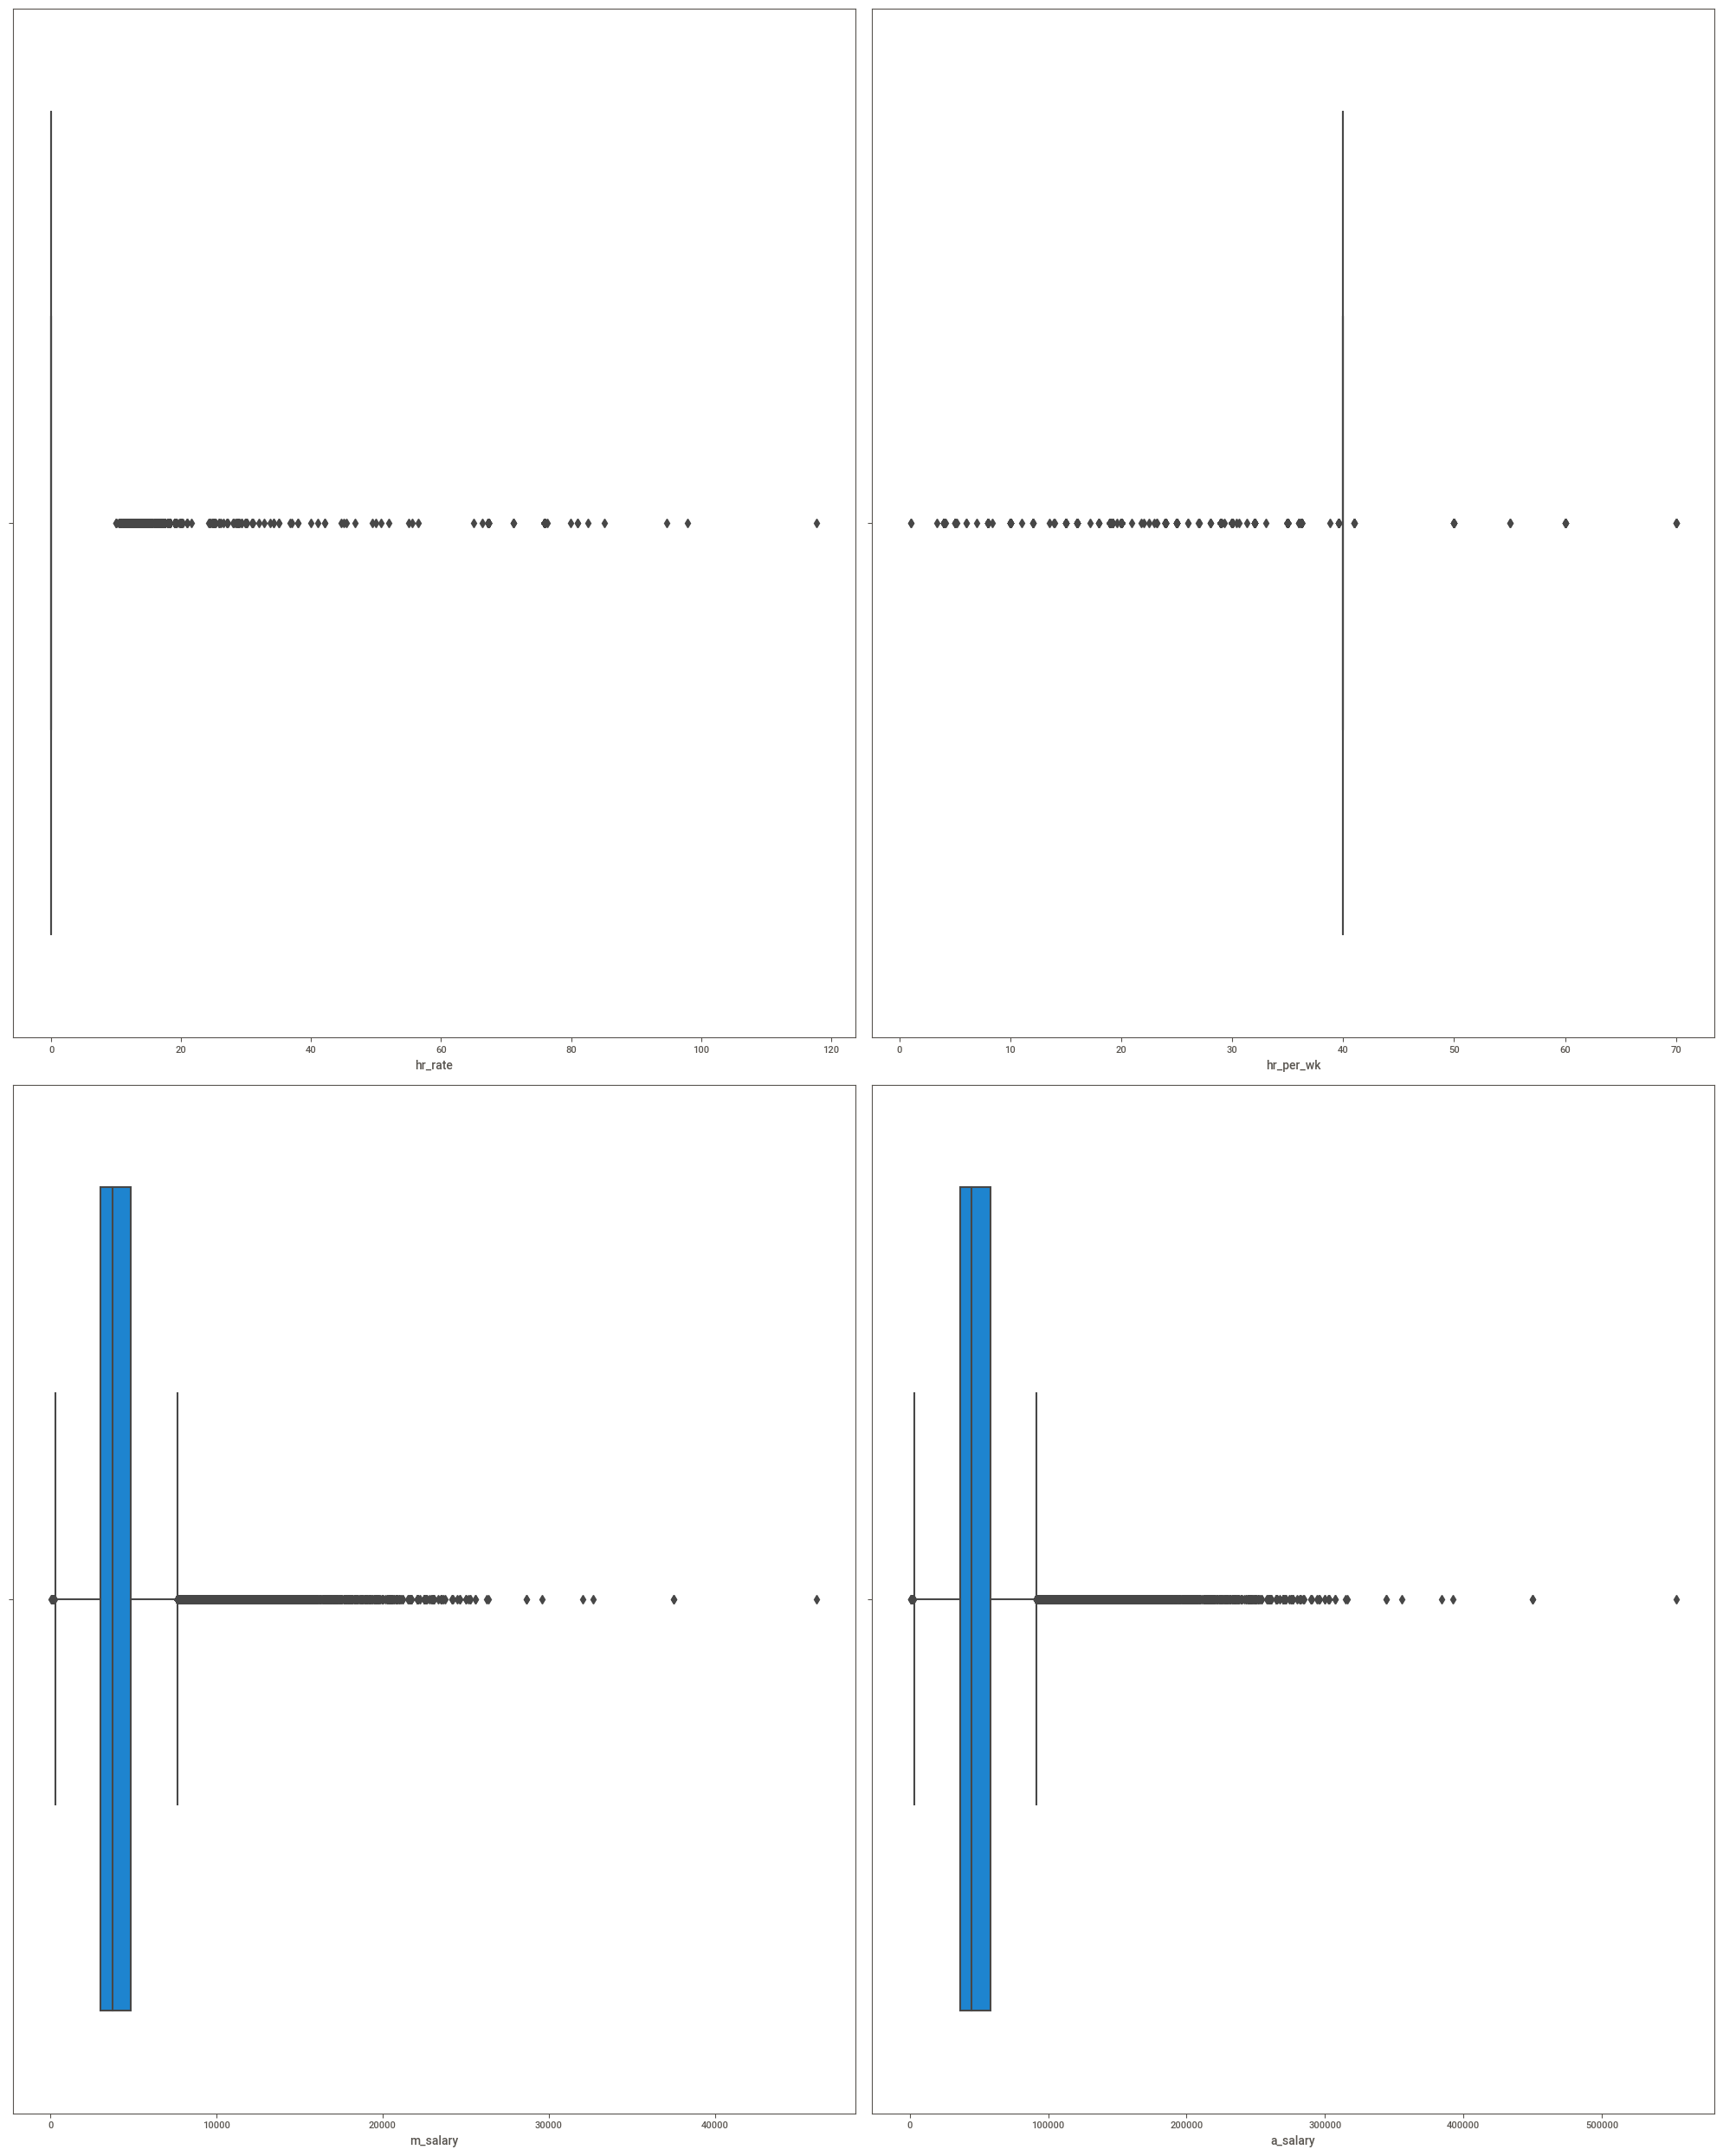

In [45]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in data3:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(data3[column])
        plotnumber+=1
        
plt.tight_layout()  

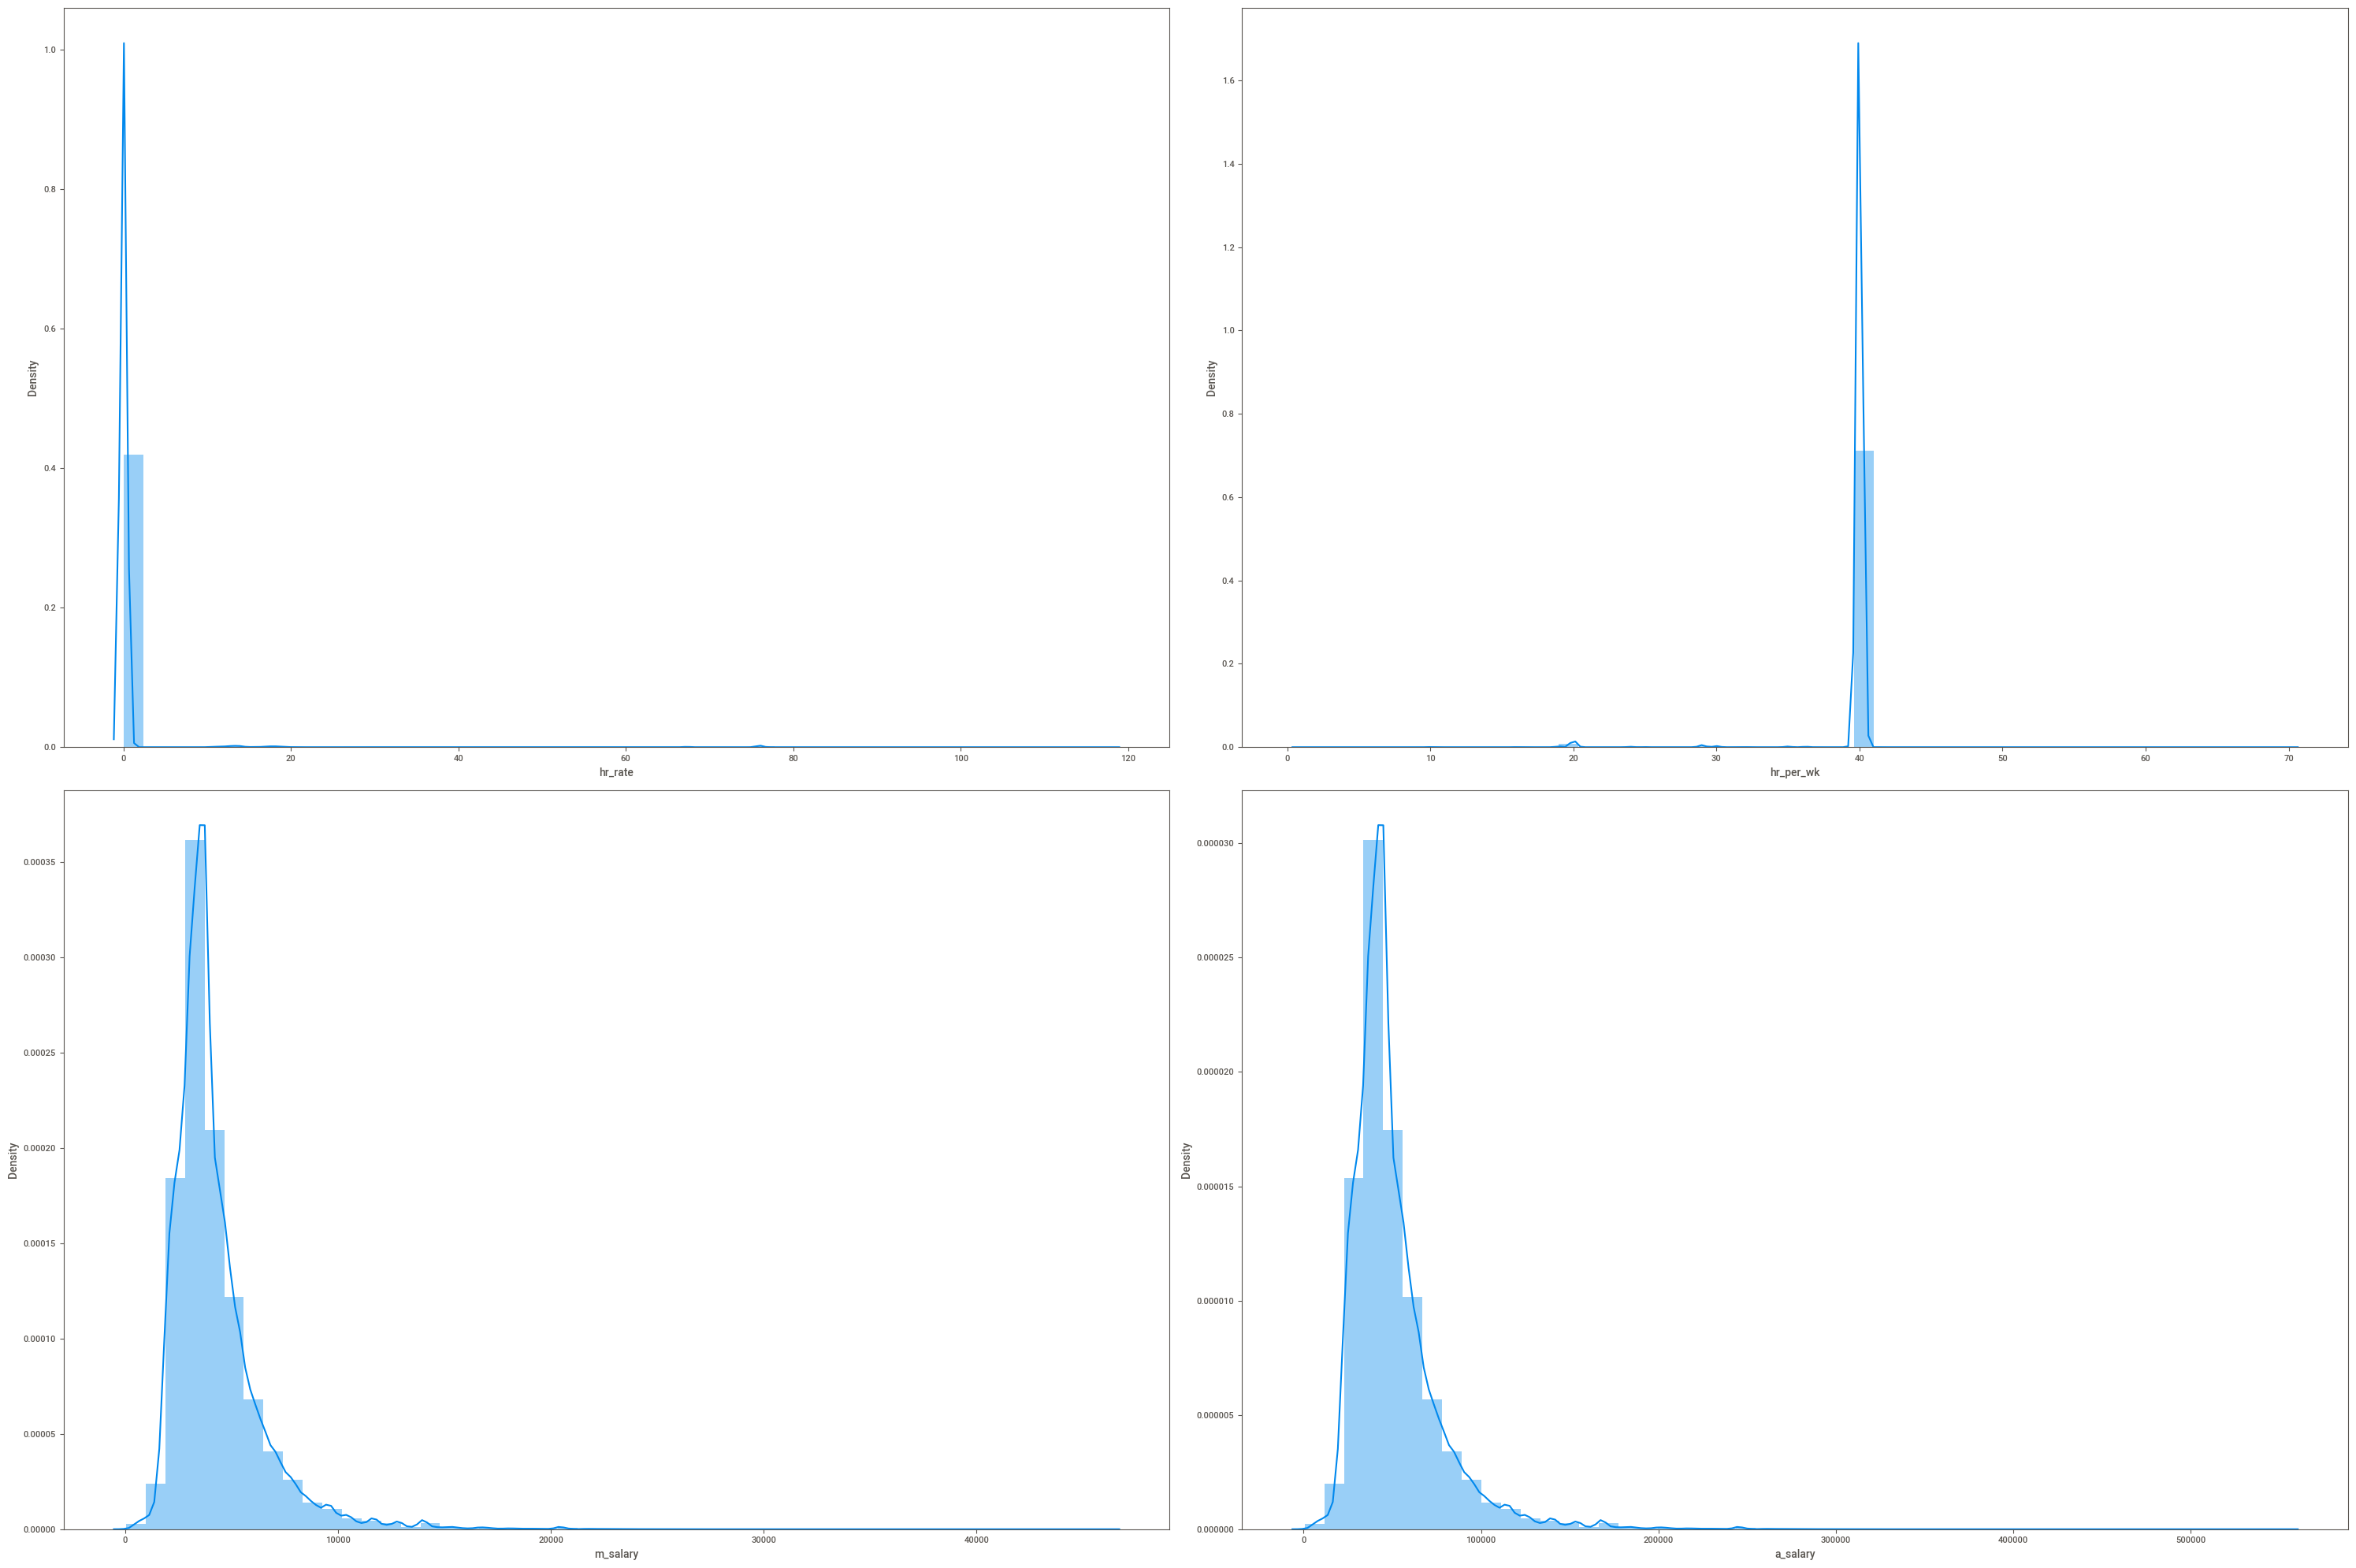

In [46]:
plt.figure(figsize=(30,20))
plotnumber=1
for column in data3:
        plt.subplot(2,2,plotnumber)
        sns.distplot(data3[column])
        plotnumber+=1
        
plt.tight_layout()    

In [47]:
# using IQR to remove the outliers of "hr_rate"
IQR = stats.iqr(data.hr_rate, interpolation = 'midpoint') 
IQR

0.0

In [48]:
# First quartile (Q1) 
Q1 = data3.hr_rate.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.hr_rate.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [49]:
print(min_limit)
print(max_limit)

0.0
0.0


In [50]:
data.loc[data3['hr_rate'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,127717
1,212,48,560,5,1,4,81.04454,4.0,1404.77,16857.24,127717
2,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,59115
3,212,48,560,5,1,4,81.04453,4.0,1404.77,16857.24,59115
8,520,4,487,5,1,6,49.40717,20.0,4281.95,51383.40,147334
...,...,...,...,...,...,...,...,...,...,...,...
149467,809,76,324,5,1,2,11.50000,40.0,1993.33,23919.96,1142494
149468,809,76,324,5,0,1,12.00000,20.0,1040.00,12480.00,1127553
149474,809,76,324,5,0,1,11.50000,20.0,996.66,11959.92,89332
149478,809,76,324,5,1,1,12.93000,20.0,1120.60,13447.20,34266


In [51]:
data.loc[data3['hr_rate'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no


In [52]:
data3.loc[data3['hr_rate'] > max_limit,'hr_rate']=np.median(data3.hr_rate)

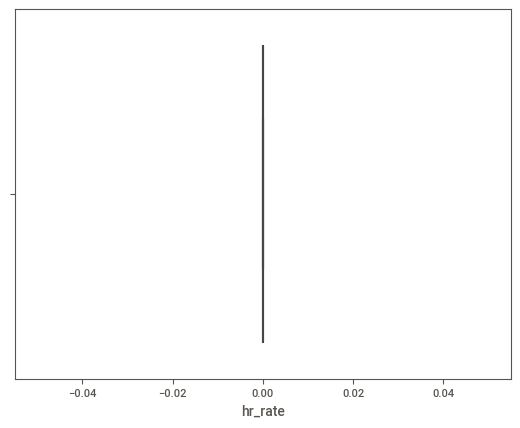

In [53]:
sns.boxplot(data3.hr_rate)
plt.show()

In [54]:
# using IQR to remove the outliers of "hr_per_wk"
IQR = stats.iqr(data.hr_per_wk, interpolation = 'midpoint') 
IQR

0.0

In [55]:
# First quartile (Q1) 
Q1 = data3.hr_per_wk.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.hr_per_wk.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [56]:
print(min_limit)
print(max_limit)

40.0
40.0


In [57]:
data.loc[data3['hr_per_wk'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
37,101,67,751,3,0,7,0.0,41.0,2694.26,32331.12,1164354
53,101,67,765,5,0,7,0.0,41.0,4140.18,49682.16,37375
56,101,67,751,5,1,7,0.0,41.0,4098.93,49187.16,51668
63,101,67,751,3,0,7,0.0,41.0,3365.40,40384.80,152257
78,101,67,751,5,1,7,0.0,41.0,5021.45,60257.40,152770
80,102,42,442,5,1,7,0.0,50.0,3000.00,36000.00,531649
81,102,42,442,3,0,7,0.0,60.0,922.50,11070.00,194014
82,102,42,442,3,1,7,0.0,55.0,2280.59,27367.08,182335
83,102,42,442,5,0,7,0.0,60.0,5437.07,65244.84,152904
84,102,42,442,5,0,7,0.0,50.0,6250.00,75000.00,1055307


In [58]:
data.loc[data3['hr_per_wk'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,127717
1,212,48,560,5,1,4,81.04454,4.0,1404.77,16857.24,127717
2,241,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,59115
3,212,48,560,5,1,4,81.04453,4.0,1404.77,16857.24,59115
8,520,4,487,5,1,6,49.40717,20.0,4281.95,51383.40,147334
...,...,...,...,...,...,...,...,...,...,...,...
149465,809,76,324,4,0,1,12.00000,20.0,1040.00,12480.00,1246178
149468,809,76,324,5,0,1,12.00000,20.0,1040.00,12480.00,1127553
149474,809,76,324,5,0,1,11.50000,20.0,996.66,11959.92,89332
149478,809,76,324,5,1,1,12.93000,20.0,1120.60,13447.20,34266


In [59]:
data3.loc[data3['hr_per_wk'] > max_limit,'hr_per_wk']=np.median(data3.hr_per_wk)

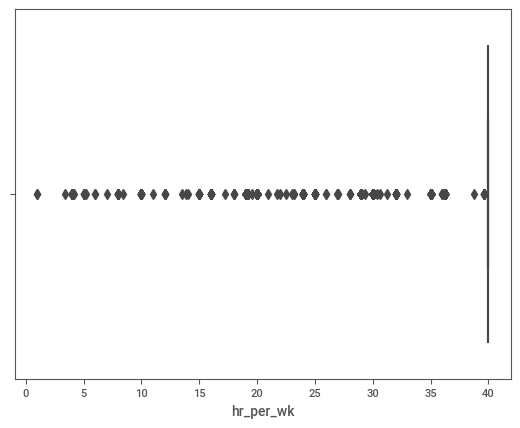

In [60]:
sns.boxplot(data3.hr_per_wk)
plt.show()

In [61]:
# using IQR to remove the outliers of "m_salary"
IQR = stats.iqr(data.m_salary, interpolation = 'midpoint') 
IQR

1845.9700000000003

In [62]:
# First quartile (Q1) 
Q1 = data3.m_salary.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.m_salary.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [63]:
print(min_limit)
print(max_limit)

250.88499999999976
7634.765000000001


In [64]:
data.loc[data3['m_salary'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717
2,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,59115
5,302,54,399,3,0,0,0.0000,40.0,12899.00,154788.00,1177785
7,510,82,399,5,1,0,0.0000,40.0,10000.00,120000.00,147334
36,101,67,750,5,0,7,0.0000,40.0,8000.00,96000.00,49800
...,...,...,...,...,...,...,...,...,...,...,...
149374,809,76,399,5,0,0,0.0000,40.0,10583.34,127000.08,336971
149393,809,76,856,3,1,0,0.0000,40.0,8358.41,100300.92,9905
149401,809,76,855,2,1,0,0.0000,40.0,7916.67,95000.04,38235
149415,809,76,398,5,0,0,0.0000,40.0,10188.09,122257.08,52817


In [65]:
data.loc[data3['m_salary'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
141394,101,67,751,5,1,10,20.0,1.0,86.66,1039.92,176291
141415,101,67,751,4,0,10,20.0,1.0,86.66,1039.92,1246122
141808,102,42,442,3,1,8,0.0,10.0,100.00,1200.00,118315
141809,102,42,442,5,0,8,0.0,10.0,200.00,2400.00,1164537
141897,102,42,442,3,1,8,0.0,20.0,100.00,1200.00,338420
141901,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,931560
142033,102,42,442,5,0,8,0.0,20.0,250.00,3000.00,1247654
142067,102,42,442,2,1,8,0.0,10.0,50.00,600.00,851628
142114,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,336571
142205,102,42,442,5,0,8,0.0,4.0,210.12,2521.44,775718


In [66]:
data3.loc[data3['m_salary'] > max_limit,'m_salary']=np.median(data3.m_salary)

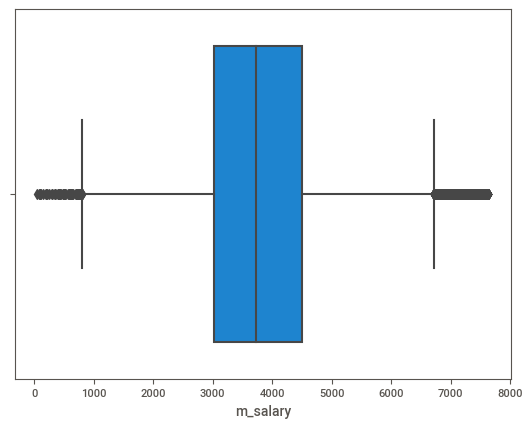

In [67]:
sns.boxplot(data3.m_salary)
plt.show()

In [68]:
# using IQR to remove the outliers of "a_salary"
IQR = stats.iqr(data.a_salary, interpolation = 'midpoint') 
IQR

22151.64

In [69]:
# First quartile (Q1) 
Q1 = data3.a_salary.quantile(0.25)

# Third quartile (Q3) 
Q3 = data3.a_salary.quantile(0.75)

##getting the limits
min_limit = Q1 - 1.5*IQR

max_limit = Q3 +1.5*IQR

In [70]:
print(min_limit)
print(max_limit)

3010.6200000000026
91617.18


In [71]:
data.loc[data3['a_salary'] > max_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717
2,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,59115
5,302,54,399,3,0,0,0.0000,40.0,12899.00,154788.00,1177785
7,510,82,399,5,1,0,0.0000,40.0,10000.00,120000.00,147334
36,101,67,750,5,0,7,0.0000,40.0,8000.00,96000.00,49800
...,...,...,...,...,...,...,...,...,...,...,...
149374,809,76,399,5,0,0,0.0000,40.0,10583.34,127000.08,336971
149393,809,76,856,3,1,0,0.0000,40.0,8358.41,100300.92,9905
149401,809,76,855,2,1,0,0.0000,40.0,7916.67,95000.04,38235
149415,809,76,398,5,0,0,0.0000,40.0,10188.09,122257.08,52817


In [72]:
data.loc[data3['a_salary'] < min_limit]

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
141394,101,67,751,5,1,10,20.0,1.0,86.66,1039.92,176291
141415,101,67,751,4,0,10,20.0,1.0,86.66,1039.92,1246122
141808,102,42,442,3,1,8,0.0,10.0,100.00,1200.00,118315
141809,102,42,442,5,0,8,0.0,10.0,200.00,2400.00,1164537
141897,102,42,442,3,1,8,0.0,20.0,100.00,1200.00,338420
141901,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,931560
142033,102,42,442,5,0,8,0.0,20.0,250.00,3000.00,1247654
142067,102,42,442,2,1,8,0.0,10.0,50.00,600.00,851628
142114,102,42,442,5,1,8,0.0,20.0,100.00,1200.00,336571
142205,102,42,442,5,0,8,0.0,4.0,210.12,2521.44,775718


In [73]:
data3.loc[data3['a_salary'] > max_limit,'a_salary']=np.median(data3.a_salary)

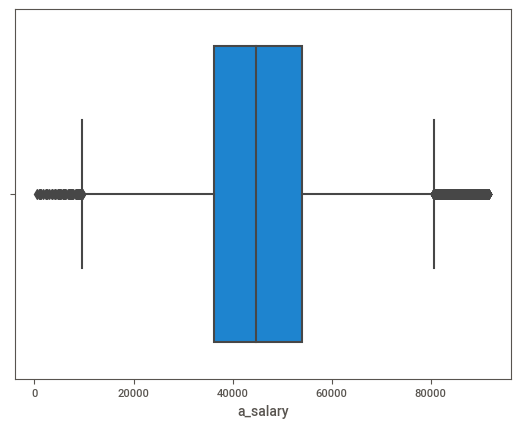

In [74]:
sns.boxplot(data3.a_salary)
plt.show()

In [75]:
data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717


In [76]:
data.columns

Index(['agency', 'agency_name', 'class_title', 'ethnicity', 'gender', 'status',
       'hr_rate', 'hr_per_wk', 'm_salary', 'a_salary', 'state_no'],
      dtype='object')

<AxesSubplot:>

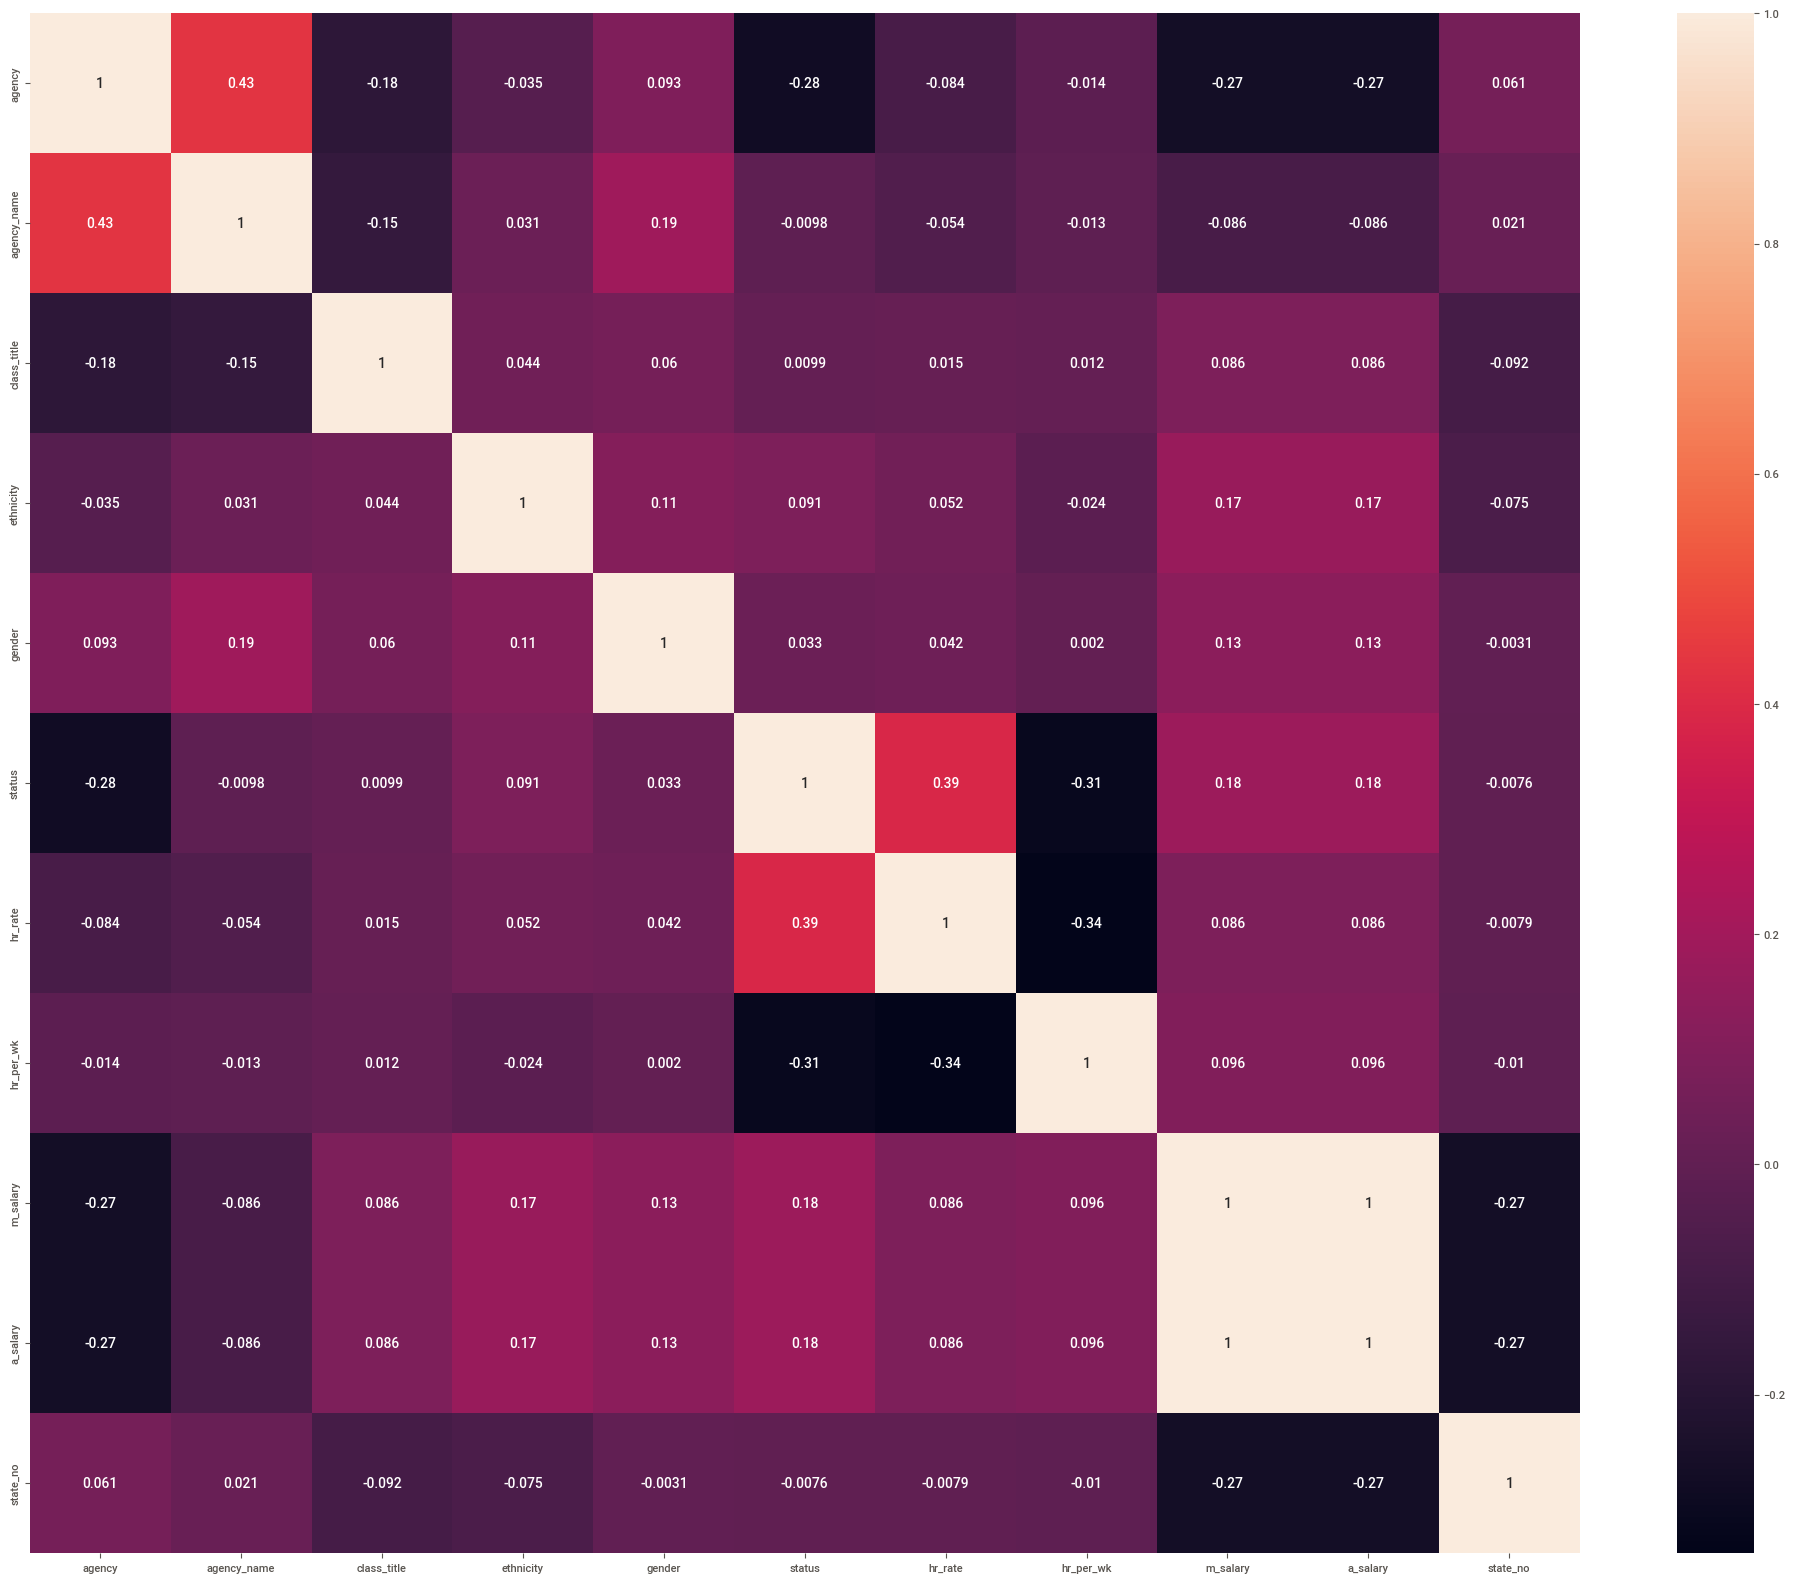

In [77]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True)

In [78]:
final_data = data [ ['agency', 'agency_name', 'class_title', 'ethnicity', 'gender', 'status',
       'hr_rate', 'hr_per_wk', 'm_salary', 'a_salary', 'state_no'] ]

#### We will scale our numerical data that can help to improve the performance of the model and make it more interpretable. Using StandardScaler() function from sklearn we can scale some numerical data columns.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
num_cols = ["hr_rate","hr_per_wk","m_salary","a_salary","state_no"]

final_data[num_cols] = scaler.fit_transform(final_data[num_cols])

In [80]:
final_data.head(1)

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,a_salary,state_no
0,241,17,711,5,1,8,17.954538,-4.610854,2.541505,2.541505,-0.914037


###### ================================================================================================================

# Task 2

## Model Creation:

In [81]:
# create dependent and independent variable
X=final_data.drop(['a_salary'], axis=1)
y=final_data[['a_salary']]

In [82]:
X

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,state_no
0,241,17,711,5,1,8,17.954538,-4.610854,2.541505,-0.914037
1,212,48,560,5,1,4,19.161489,-15.368878,-1.347957,-0.914037
2,241,17,711,5,1,8,17.954538,-4.610854,2.541505,-1.057370
3,212,48,560,5,1,4,19.161487,-15.368878,-1.347957,-1.057370
4,696,88,292,3,0,0,-0.082272,0.122677,-0.450008,-0.836077
...,...,...,...,...,...,...,...,...,...,...
149476,809,76,1198,5,1,0,-0.082272,0.122677,-0.634074,0.429544
149477,809,76,1404,5,0,0,-0.082272,0.122677,0.608577,0.589692
149478,809,76,324,5,1,1,2.987914,-8.483742,-1.483721,-1.109288
149479,809,76,1007,5,1,0,-0.082272,0.122677,0.725227,-0.922869


In [83]:
y

,a_salary
0,2.541505
1,-1.347957
2,2.541505
3,-1.347957
4,-0.450008
...,...
149476,-0.634074
149477,0.608577
149478,-1.483721
149479,0.725227


In [84]:
# Spliting data to training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [85]:
X_train

,agency,agency_name,class_title,ethnicity,gender,status,hr_rate,hr_per_wk,m_salary,state_no
29119,454,89,1034,3,0,0,-0.082272,0.122677,0.679706,-0.517047
90072,601,91,19,5,0,0,-0.082272,0.122677,0.046350,-1.071335
64932,529,40,543,3,0,0,-0.082272,0.122677,-1.183784,-0.808272
27044,405,28,1198,5,0,0,-0.082272,0.122677,-0.626378,-0.956860
88422,601,91,399,3,1,0,-0.082272,0.122677,2.901821,-0.814680
...,...,...,...,...,...,...,...,...,...,...
55366,529,40,1056,2,0,0,-0.082272,0.122677,-0.782557,-0.458312
123012,696,88,294,2,1,1,-0.082272,-8.483742,-1.297720,1.438781
59358,529,40,235,2,0,0,-0.082272,0.122677,-0.830271,-0.959338
103904,696,88,292,2,1,0,-0.082272,0.122677,-0.356129,0.893672


In [86]:
y_train

,a_salary
29119,0.679706
90072,0.046350
64932,-1.183784
27044,-0.626378
88422,2.901821
...,...
55366,-0.782557
123012,-1.297720
59358,-0.830271
103904,-0.356129


### Model creation by using linear regression:

In [87]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()                           
LR.fit(X_train,y_train)             
y_predict = LR.predict(X_test)

In [88]:
y_test #actual

,a_salary
3323,-0.426569
104462,-0.576342
124349,-0.241753
141653,-1.032769
76028,1.001133
...,...
60969,-0.847036
90356,0.050612
132537,-0.356129
59553,0.809284


In [89]:
y_predict #predicted

array([[-0.42656932],
       [-0.57634205],
       [-0.24175296],
       ...,
       [-0.35612851],
       [ 0.80928382],
       [-0.61431435]])

In [90]:
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr_r2score = r2_score(y_test,y_predict) 
lr_r2score

1.0

In [91]:
X_test.shape

(37371, 10)

In [92]:
## calculation of adjusted r2 score
lr_adjusted_r2 = 1-(1-1)*(37371-10)/(37371-10-1) 
lr_adjusted_r2

1.0

In [93]:
# Mean Squared Error & Mean Absolute Error
import math
lr_mse  = mean_squared_error(y_test, y_predict)
lr_rmse = math.sqrt(mean_squared_error(y_test,y_predict))
lr_mae  = mean_absolute_error(y_test, y_predict)

In [94]:
print("MSE :", lr_mse)
print("RMSE :", lr_rmse)
print("MAE :", lr_mae)

MSE : 7.6380327227300005e-28
RMSE : 2.7636991013368297e-14
MAE : 2.3735780564385342e-14


### Model creation by using Decision tree regressor :

In [95]:
from sklearn.tree import DecisionTreeRegressor 

DTR= DecisionTreeRegressor(random_state=44)
DTR.fit(X_train, y_train)
predictions = DTR.predict(X_test)

In [96]:
#Model evaluation
dtr_r2score = r2_score(y_test,predictions)
dtr_r2score

0.9984889572214578

In [97]:
dtr_adjusted_r2 = 1-(1-0.99)*(37371-10)/(37371-10-1)
dtr_adjusted_r2

0.9899997323340471

In [98]:
dtr_mse  = mean_squared_error(y_test, predictions)
dtr_rmse = math.sqrt(mean_squared_error(y_test,predictions))
dtr_mae  = mean_absolute_error(y_test, predictions)

In [99]:
print("MSE :", dtr_mse)
print("RMSE :", dtr_rmse)
print("MAE :", dtr_mae)

MSE : 0.0015820968651304097
RMSE : 0.039775581267033795
MAE : 0.0004090616766236421


### Model creation by using Random forest regressor :

In [100]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [101]:
y_predict=rfr.predict(X_test)
y_predict

array([-0.42656932, -0.57634205, -0.24175296, ..., -0.35612851,
        0.80928429, -0.61431435])

In [102]:
rfr_r2score = r2_score(y_test,y_predict)
rfr_r2score

0.9979707064555714

In [103]:
rfr_adjusted_r2 = 1-(1-0.99)*(37371-10)/(37371-10-1)
rfr_adjusted_r2

0.9899997323340471

In [104]:
print('MSE :',mean_squared_error(y_test, y_predict))
print('MAE :',mean_absolute_error(y_test, y_predict))

MSE : 0.0021247174472236938
MAE : 0.0004964083921256698


### Model creation by using GradientBoostingRegressor :

In [107]:
gbr=GradientBoostingRegressor(learning_rate=0.01, loss='squared_error', n_estimators=100)
gbr.fit(X_train,y_train)
y_predict=gbr.predict(X_test)

In [108]:
rfr_r2score = r2_score(y_test,y_predict)
rfr_r2score

0.8427327363126639

In [109]:
print('Mean Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))

Mean Squard Error IS :      0.164662475742361
Mean Absolute Error Is :    0.25629091826960587


#### After performing different regressor models for predictive analysis we are sure that "LinearRegression" is the    best fit regressor model for our dataset to predict salary information of employees.

###### ================================================================================================================

# Task 3

###  Who are the outliers in the salaries?

In [110]:
data = pd.read_csv('salary.csv')

In [111]:
data.head(1)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN


<AxesSubplot:xlabel='ANNUAL'>

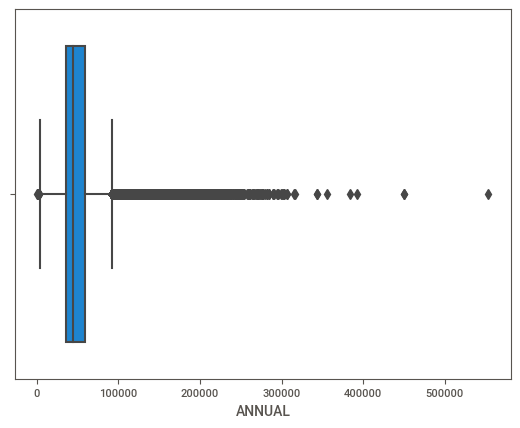

In [112]:
sns.boxplot(x='ANNUAL',data=data)

In [113]:
IQR= stats.iqr(data.ANNUAL,interpolation='midpoint')
IQR

22151.64

In [115]:
Q1= data.ANNUAL.quantile(0.25)
Q3= data.ANNUAL.quantile(0.75)
print(Q1)
print(Q3)

36238.08
58389.72


In [116]:
low_limit= Q1- 1.5*IQR
upp_limit= Q3+ 1.5*IQR
print(low_limit)
print(upp_limit)

3010.6200000000026
91617.18


In [117]:
lower = data.loc[data['ANNUAL']< low_limit]
lower

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
141901,102,HOUSE OF REPRESENTATIVES ...,CUTBIRTH,JOE,H,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,931560,NaN,NaN,NaN,NaN,NaN
142033,102,HOUSE OF REPRESENTATIVES ...,HARRIS,KATHARINE,T,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,250.00,3000.00,1247654,NaN,NaN,NaN,NaN,NaN
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.00,600.00,851628,NaN,NaN,NaN,NaN,NaN
142114,102,HOUSE OF REPRESENTATIVES ...,KOENIG,REID,A,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,336571,NaN,NaN,NaN,NaN,NaN
142205,102,HOUSE OF REPRESENTATIVES ...,MITCHELL,JESSICA,B,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,4.0,210.12,2521.44,775718,NaN,NaN,NaN,NaN,NaN


In [118]:
upper = data.loc[data['ANNUAL']>upp_limit]
upper

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0000,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


In [119]:
df=pd.concat([lower,upper])
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### What departments/roles have the biggest wage disparities between managers and employees?

In [120]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [121]:
data.describe(include="O")

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [122]:
data[['AGENCY NAME','ANNUAL']]

,AGENCY NAME,ANNUAL
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
1,OFFICE OF COURT ADMINISTRATION ...,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
3,OFFICE OF COURT ADMINISTRATION ...,16857.24
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,39411.24
...,...,...
149476,STATE PRESERVATION BOARD ...,34788.00
149477,STATE PRESERVATION BOARD ...,66000.00
149478,STATE PRESERVATION BOARD ...,13447.20
149479,STATE PRESERVATION BOARD ...,68929.92


In [123]:
max_salary = data['ANNUAL'].max()
min_salary = data['ANNUAL'].min()

In [124]:
print(max_salary)
print(min_salary)

553500.0
600.0


In [125]:
row_with_max_salary = df.loc[data['ANNUAL'] == 553500]
row_with_max_salary

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN


In [126]:
row_with_min_salary = df.loc[data['ANNUAL'] == 600]
row_with_min_salary

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.0,600.0,851628,NaN,NaN,NaN,NaN,NaN


* **CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS department is paying highest salary of 553500.0 to CHIEF SCIENTIFIC OFFICER.**

* **HOUSE OF REPRESENTATIVES department is paying lowest salary of 600.0 to ELECTED OFFICIALS STAFF.**

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Have salaries and total compensations for some roles/ departments/ head-count changed over time?

In [127]:
data1=data[['AGENCY NAME','CLASS TITLE','ANNUAL','EMPLOY DATE']]
data1

,AGENCY NAME,CLASS TITLE,ANNUAL,EMPLOY DATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,39411.24,06/29/20
...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,34788.00,10/30/17
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,66000.00,07/13/15
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,13447.20,10/15/12
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,68929.92,09/22/89


In [128]:
df = data1.groupby([ 'AGENCY NAME','CLASS TITLE','EMPLOY DATE'])
x= df.first()
x

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        EMPLOY DATE          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]

#### Yes, for few CLASS TITLE with respect to AGENCY NAME, the salaries have changed over a period of time, however for few salaries haven't changed.

###### =================================================================================================================

## Conclusion :

* This database has salary information for positions at all 113 agencies in the Texas state government. The Tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.

* Our main objective is to predict salary information of employees at different agencies in Texas state government using given twenty one features.

* We were able to analyse the salary information and built different models which help us to analyse the dataset properly.We classify the dataset according to the data preparing description. We showed various plots for easy reading and understanding.

* After the EDA, the dataset was preprocessed by using categorical data encoding using LabelEncoder,removing outliers, scaling some numerical columns.

* We take 'agency', 'agency_name', 'class_title', 'ethnicity', 'gender', 'status','hr_rate', 'hr_per_wk', 'm_salary', 'state_no'  as relevent feature as our input variables and "a_salary" i.e. annual salary as our target variable.

* Performed models are "LinearRegressor", "DecisionTree", "RandomForest", "GradientBoostingRegressor" to be compared by the used of r2score, adjusted r2 score, mse, mae and based on that the **linear regressor** came out on top. 

## Challenges faced :

### There are some of challenges that as a team we face are :
#### 1. Poor Quality of Data
* One of the significant issues our team face is the absence of good quality data. Unclean and noisy data can make the whole process extremely exhausting. There is null values in "duplicated", "comb_mlti_jobs", "summed_annual_salary", "hide_from_search" In many features there is a lack of variation like the standard deviation for "multiple full time jobs" column is 0, means no variance in the data. 
* to overcome this issue we drop some features because having more then 96% of missing values, we are ignoring those columns

#### 2. Slow  process
* The machine learning models are highly efficient in providing accurate results, but it takes a tremendous amount of time.At the time of exploratory data analysis process it take lot of time when analyse bivariate and multivariate analysis.
* So to overcome this issue we did bivariate analysis of relevent featues only.

#### 3. Underfitting of Training Data
* This process occurs when data is unable to establish an accurate relationship between input and output variables.It signifies the data is too simple to establish a precise relationship.
* To overcome this issue: Maximize the training time,add relevent features to the data, increasing the training time of model.

#### 4. Overfitting of Training Data
* Overfitting refers to ML model trained with a massive amount of data that negatively affect its performance.
* We can tackle this issue by:Analyzing the data with perfection, remove outliers in the training set, remove unwanted feature. 
* For particular agency_name their will be unique agency_code, so we are droping agency_name and also We dropped last name, first name, MI and emp_date because these are not relevent features for our model creation.



###### ================================================================================================================